In [1]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:\Teks Academy\Statistics\bodyPerformance.csv')

In [3]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(exclude='object')

In [5]:
df['body fat_%'].mean()

23.240164950869858

In [6]:
from scipy.stats import gmean

In [7]:
gmean(df['body fat_%'])

22.053450257160534

In [8]:
statistics.harmonic_mean(df['body fat_%'])

20.766092233445065

In [9]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [10]:
statistics.median(df['body fat_%'])

22.8

In [11]:
statistics.variance(df['body fat_%'])

52.66178600041373

In [12]:
statistics.variance(df['height_cm'])

71.00729348140636

In [13]:
statistics.stdev(df['body fat_%'])

7.256844079929906

In [14]:
df.skew()

TypeError: could not convert string to float: 'M'

<Axes: ylabel='Density'>

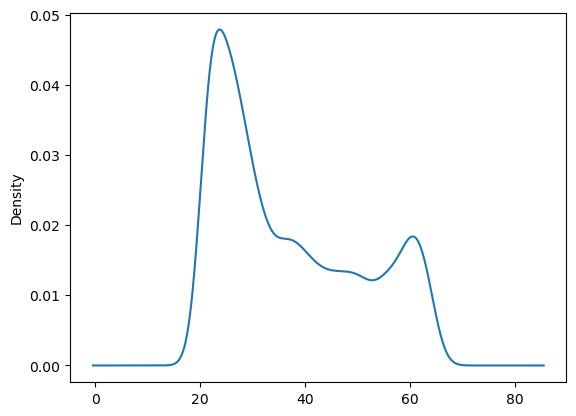

In [15]:
df['age'].plot(kind='density')

<Axes: ylabel='Density'>

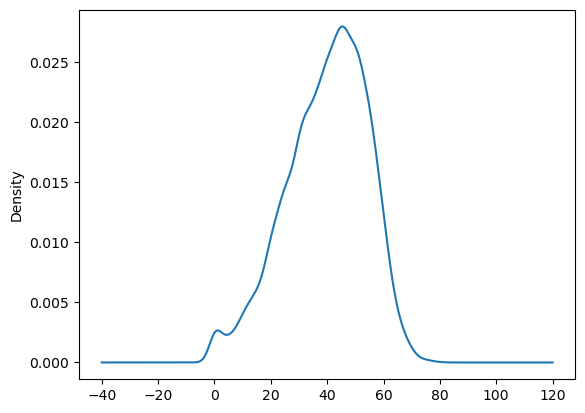

In [37]:
df['sit-ups counts'].plot(kind='density')

<Axes: xlabel='height_cm', ylabel='Density'>

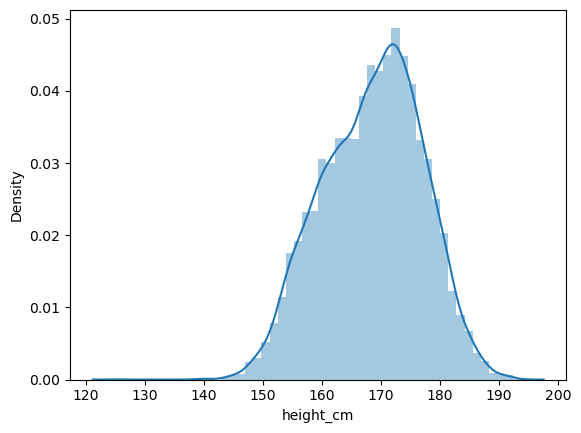

In [16]:
sns.distplot(df['height_cm'],hist=True,kde=True)

<Axes: ylabel='Density'>

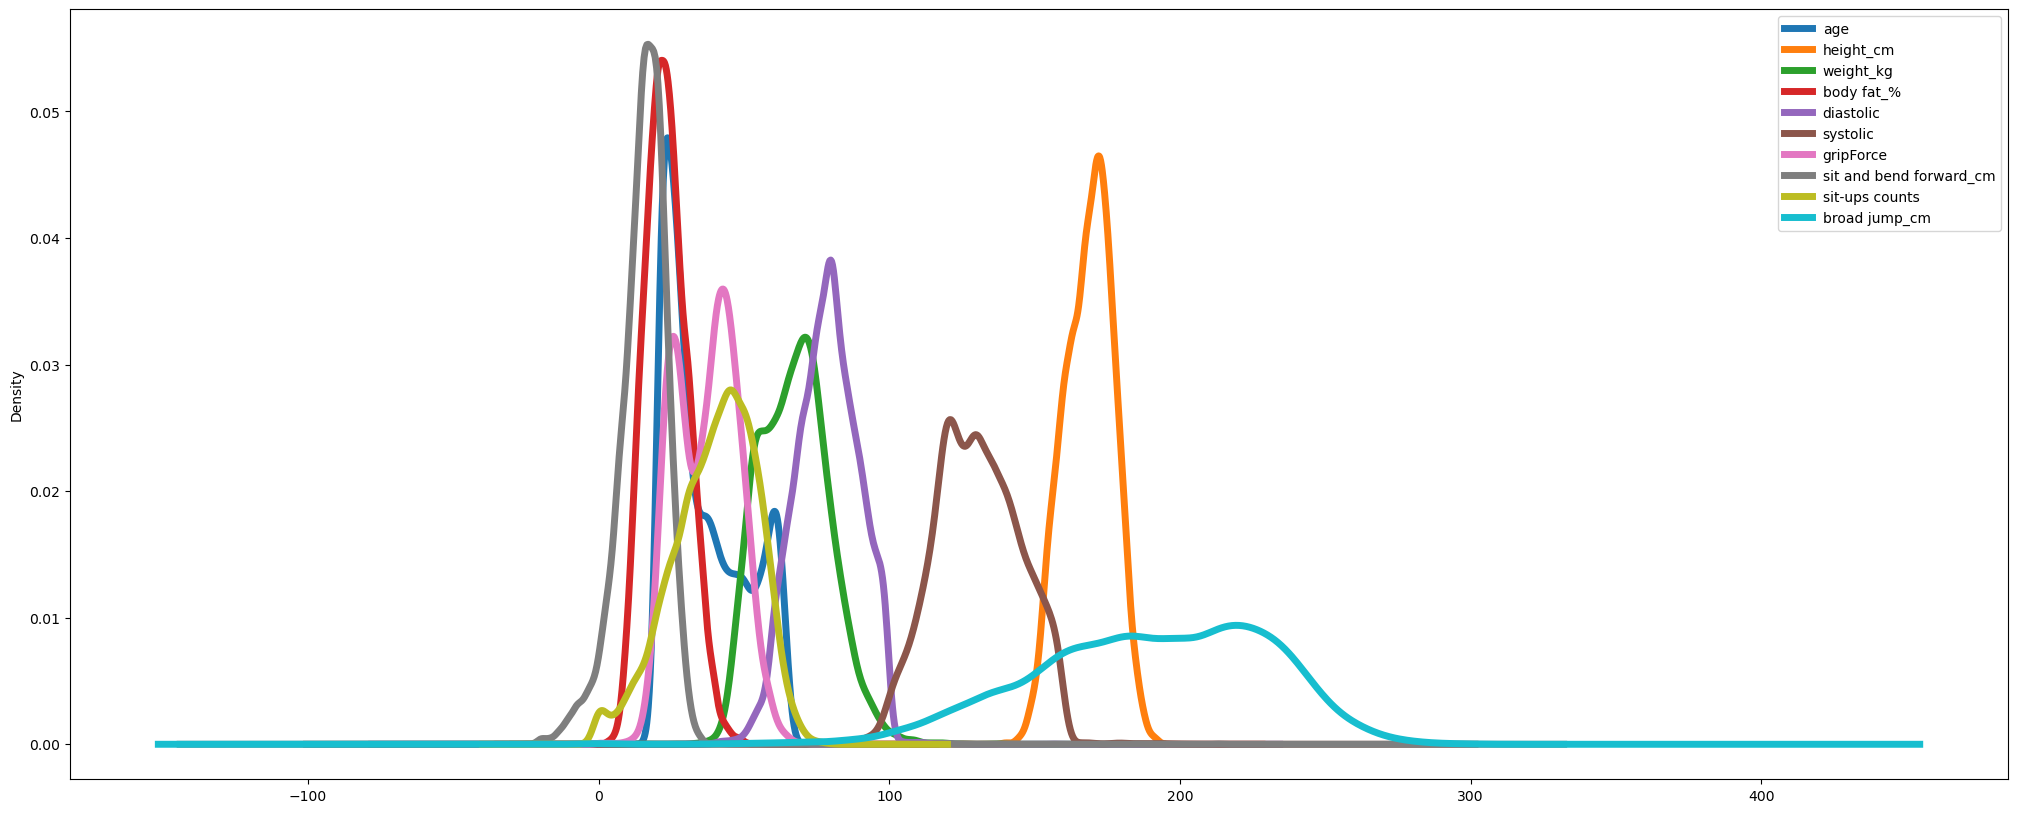

In [18]:
df.plot.density(figsize=(25,10),linewidth=5)

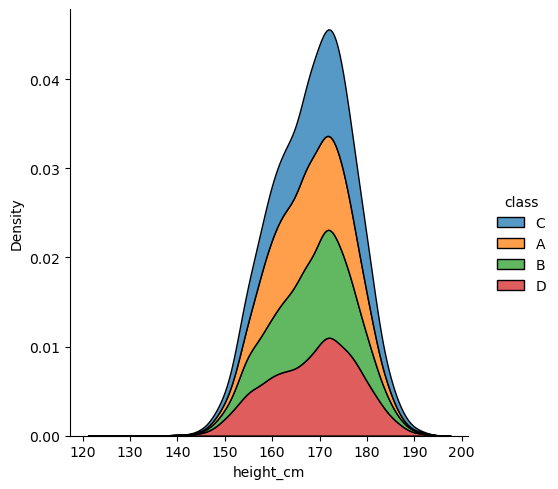

In [19]:
sns.displot(df, x='height_cm', hue='class',kind='kde',multiple='stack')

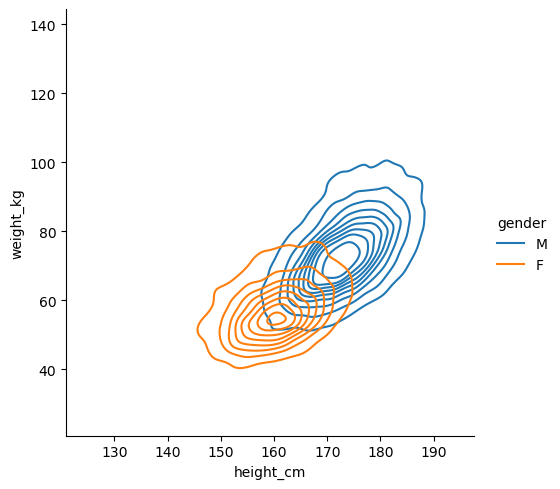

In [20]:
sns.displot(df,x='height_cm',y='weight_kg',hue='gender',kind='kde')

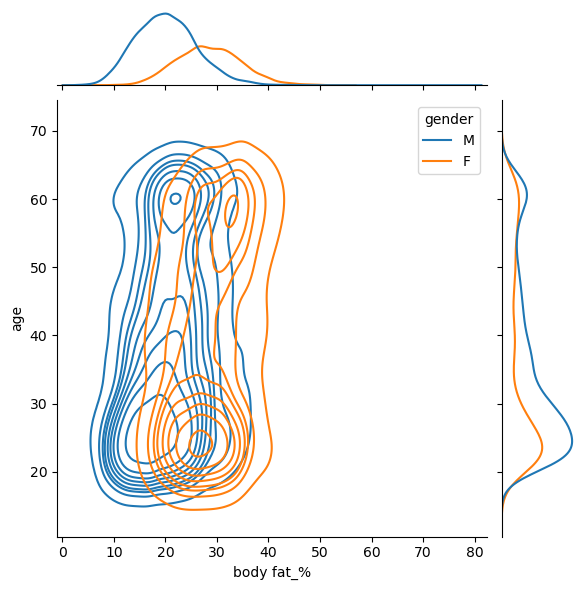

In [21]:
sns.jointplot(df,x='body fat_%',y='age',hue='gender',kind='kde')

In [22]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3-Q1
    print('IQR of %s : %d'%(col,IQR))

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


In [23]:
df['height_cm'].quantile([0.1,0.2,0.4,0.5])

0.1    156.9
0.2    160.7
0.4    166.8
0.5    169.2
Name: height_cm, dtype: float64

In [24]:
df['weight_kg'].quantile([0.1,0.2,0.4,0.5])

0.1    52.2
0.2    56.1
0.4    64.0
0.5    67.4
Name: weight_kg, dtype: float64

In [25]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.0 MB


In [27]:
for col in numeric_data.columns:
    range = df[col].max()-df[col].min()
    print('range of %s :%d'%(col,range))

range of age :43
range of height_cm :68
range of weight_kg :111
range of body fat_% :75
range of diastolic :156
range of systolic :201
range of gripForce :70
range of sit and bend forward_cm :238
range of sit-ups counts :80
range of broad jump_cm :303


In [28]:
df.mad()

AttributeError: 'DataFrame' object has no attribute 'mad'

<Axes: xlabel='height_cm', ylabel='weight_kg'>

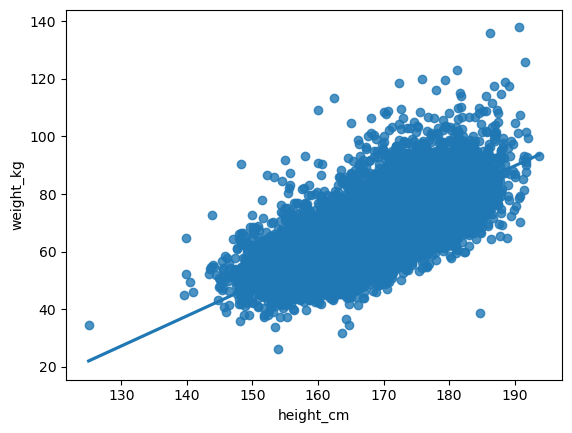

In [30]:
sns.regplot(df,x='height_cm',y='weight_kg',ci=90)

In [33]:
mean_confidence_interval(df['age'], confidence=0.95)

NameError: name 'mean_confidence_interval' is not defined

In [34]:
import statsmodels.api as sm
sm.stats.DescrStatsW(df['age']).zconfint_mean()

(36.54434346585151, 37.00586933187864)

In [35]:
import scipy.stats as stats
z_scores=stats.zscore(numeric_data)
z_scores

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418
13389,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177
13390,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013
13391,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878


In [39]:
p_values_1 = scipy.stats.norm.sf(abs(-0.717))
p_values_2 = scipy.stats.norm.sf(abs(z_scores))
p_values_3 = scipy.stats.norm.sf(abs(z_scores))*2
p_valyes_1, p_values_2, p_values_3

NameError: name 'p_valyes_1' is not defined

In [40]:
scipy.stats.norm.sf(abs(0.65))

0.2578461108058647

In [42]:
stats.ttest_ind(df['body fat_%'][df['gender']=='M'],df['body fat_%'][df['gender']=='F'])

TtestResult(statistic=-76.48742318447472, pvalue=0.0, df=13391.0)

In [43]:
from scipy.stats import f_oneway
class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit_ups counts']
print(f_oneway(class1,class2,class3))

KeyError: 'sit_ups counts'

In [44]:
from statsmodels.formula.api import ols
weight = df['weight_kg']
height = df['height_cm']
fat = df['body fat_%']
classes =df['class']
model = ols('weight~C(fat)',data=numeric_data).fit()
print(sm.stats.anova_lm(model,typ=2))

                sum_sq       df        F        PR(>F)
C(fat)    1.320194e+05    526.0  1.81387  1.015159e-25
Residual  1.780285e+06  12866.0      NaN           NaN


In [48]:
import pingouin as pg
aov = pg.anova(data=df,dv='weight_kg',between='class',detailed=True)
print(aov)

ModuleNotFoundError: No module named 'pingouin'

In [50]:
data_crosstab=pd.crosstab(df['gender'],df['class'],margins=True,margins_name='Total')
data_crosstab

class,A,B,C,D,Total
gender,,,,,
F,1484,1185,1112,1145,4926
M,1864,2162,2237,2204,8467
Total,3348,3347,3349,3349,13393


In [51]:
alpha=0.05
chi_square = 0
rows = df['gender'].unique()
columns = df['class'].unique()
for i in columns :
    for j in rows :
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total']*data_crosstab['Total'][j]/data_crosstab['Total']['Total']
        chi_square +=(O-E)**2/E

In [52]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and p value is: 0.0
Null Hypothesis is rejected.


In [53]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


<Axes: >

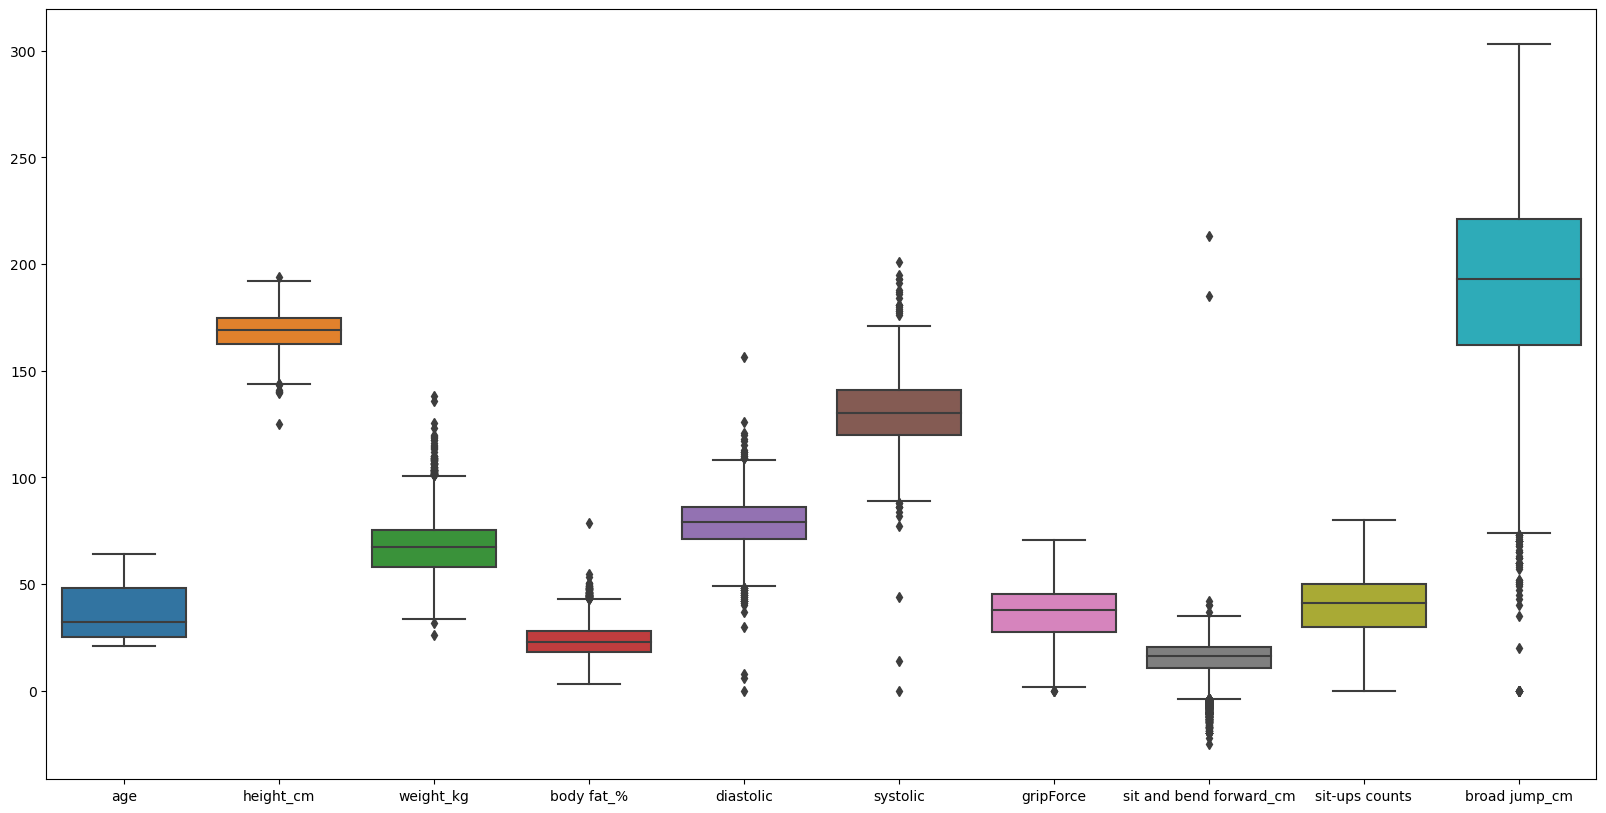

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

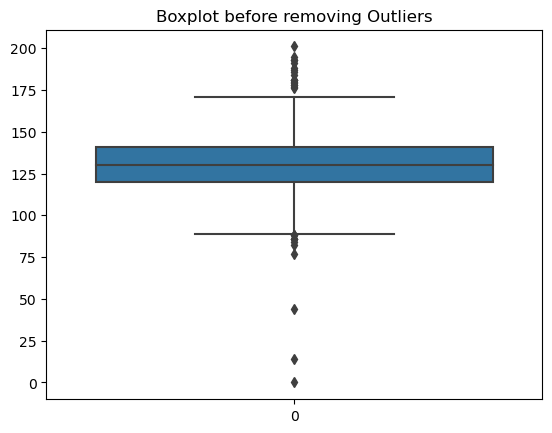

In [55]:
sns.boxplot(df['systolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

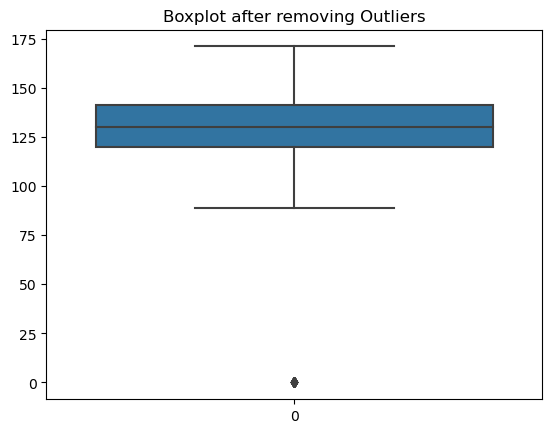

In [56]:
for i in df['systolic'] :
    q1 = df['systolic'].quantile(0.25)
    q3 = df['systolic'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1-1.5*iqr
    upper_tail = q3+1.5*iqr
    
    if i > upper_tail or i < lower_tail :
        df['systolic']=df['systolic'].replace(i,0)

sns.boxplot(df['systolic'])
plt.title('Boxplot after removing Outliers')
plt.show()

<Axes: xlabel='weight_kg', ylabel='Density'>

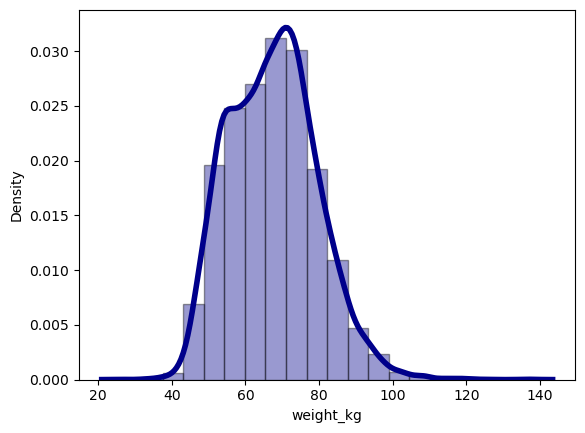

In [57]:
sns.distplot(df['weight_kg'],hist=True,kde=True,bins=20,color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})


In [58]:
import statsmodels.api as sm

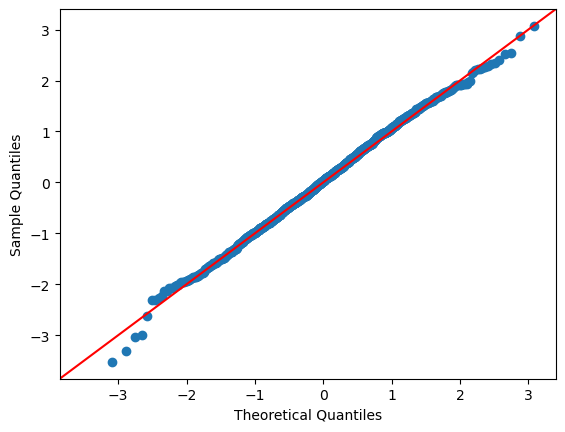

<Figure size 300x400 with 0 Axes>

In [59]:
data=np.random.normal(0,1,1000)
fig = sm.qqplot(data,line='45')
plt.figure(figsize=(3,4))
plt.show()

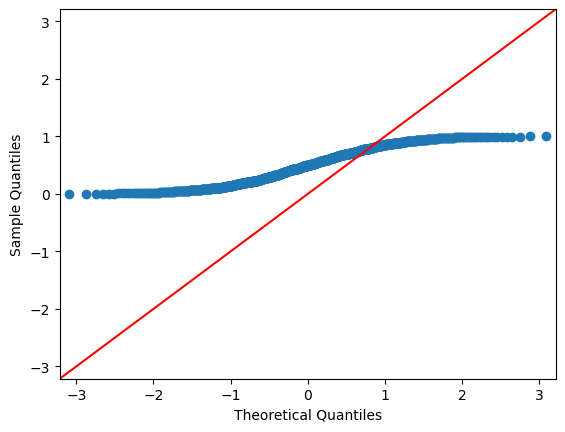

<Figure size 300x400 with 0 Axes>

In [60]:
data=np.random.uniform(0,1,1000)
fig = sm.qqplot(data,line='45')
plt.figure(figsize=(3,4))
plt.show()

<Figure size 1500x2800 with 0 Axes>

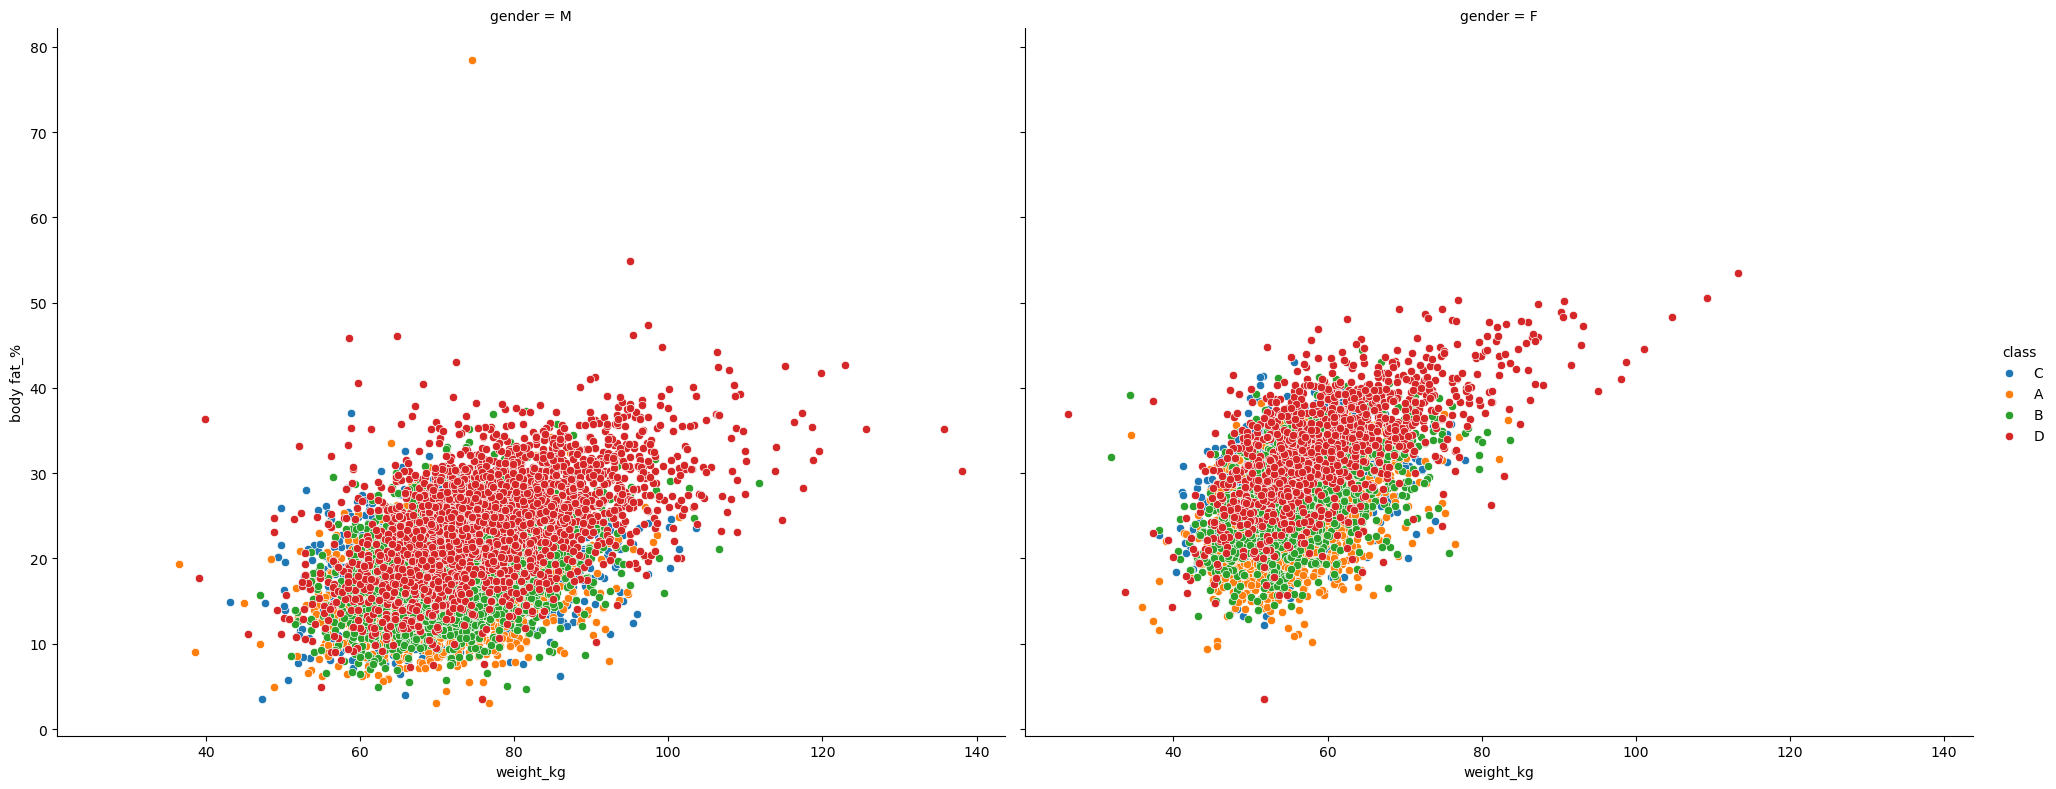

In [61]:
plt.figure(figsize=(15,28))
g = sns.FacetGrid(df,col='gender',hue='class',height=8,aspect=10/8)
g.map(sns.scatterplot,'weight_kg','body fat_%')
g.add_legend()

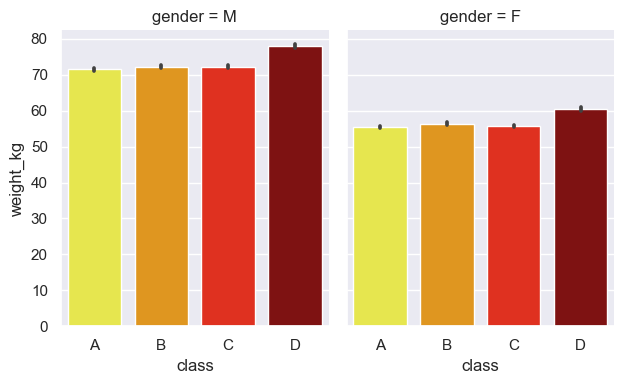

In [62]:
sns.set(rc = {'figure.figsize':(8,6)})
g = sns.FacetGrid(df, col="gender", height=4, aspect=0.8 )
g.map(sns.barplot, "class", "weight_kg",order=['A','B','C','D'],palette='hot_r' )

<Axes: xlabel='class', ylabel='count'>

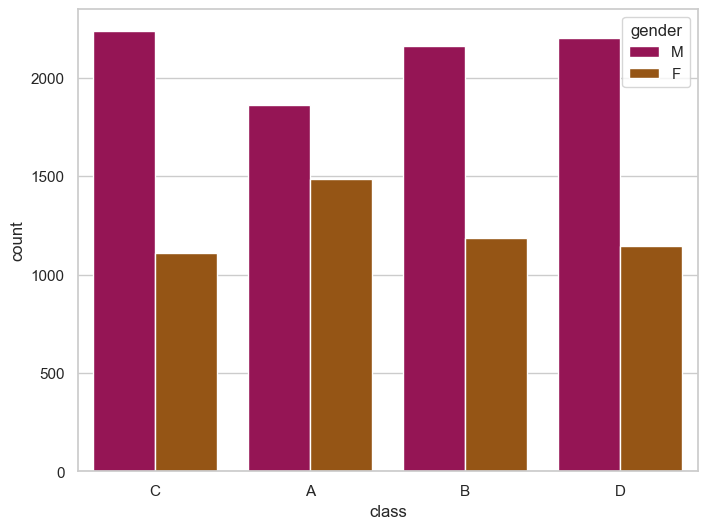

In [63]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.countplot(x='class',hue='gender',data=df,palette='brg')

<Axes: xlabel='class', ylabel='body fat_%'>

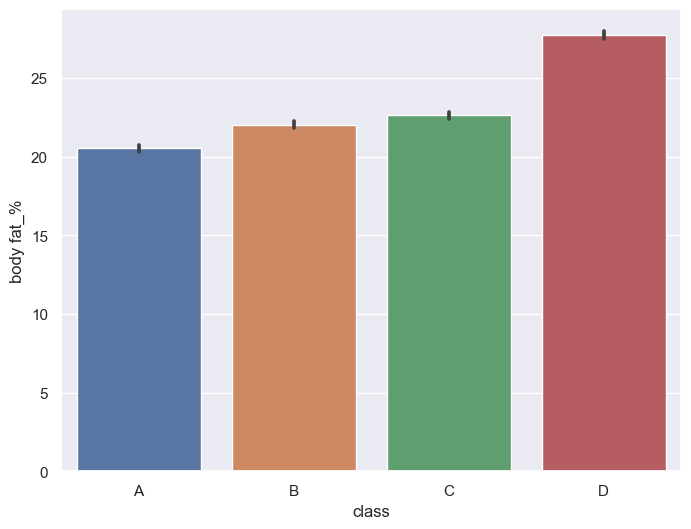

In [64]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(data = df, x='class',y='body fat_%',order=['A','B','C','D'])

<Figure size 1500x600 with 0 Axes>

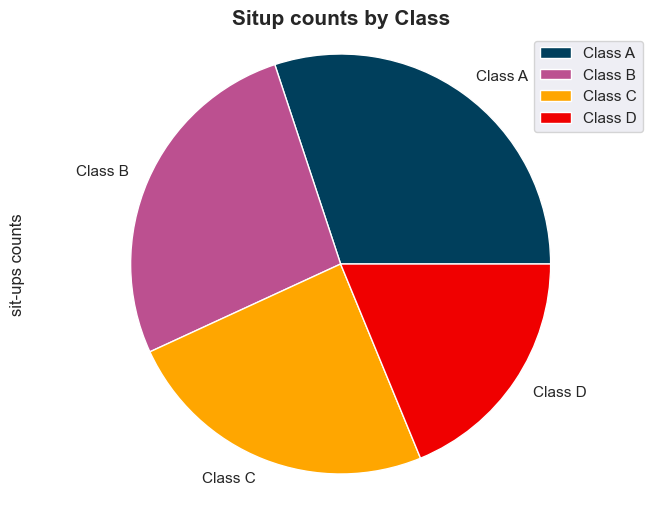

In [65]:
plt.figure(figsize=(15, 6))
labels=['Class A', 'Class B', 'Class C','Class D']
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#003f5c', '#bc5090', '#ffa600','#f00000'])
plt.axis('equal')
plt.title('Situp counts by Class', fontsize=15, fontweight='bold');

<Figure size 1500x600 with 0 Axes>

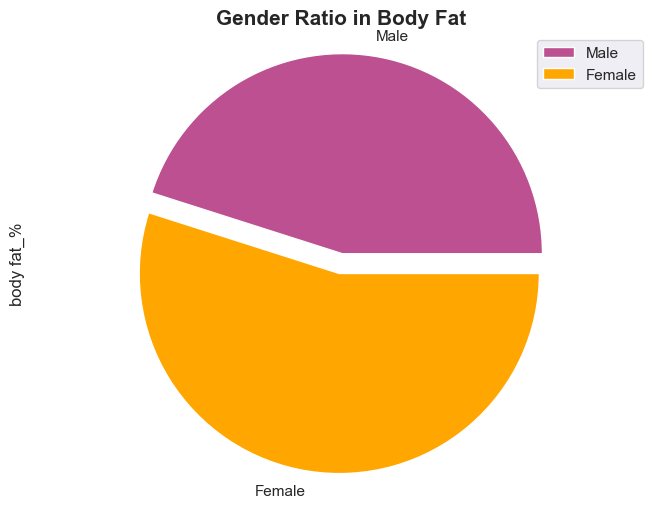

In [66]:
plt.figure(figsize=(15, 6))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#bc5090', '#ffa600'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold');